# DEMO: **Term-Frequency** (TF) and **Inverse Document Frequency** (IDF) - Sample Application  

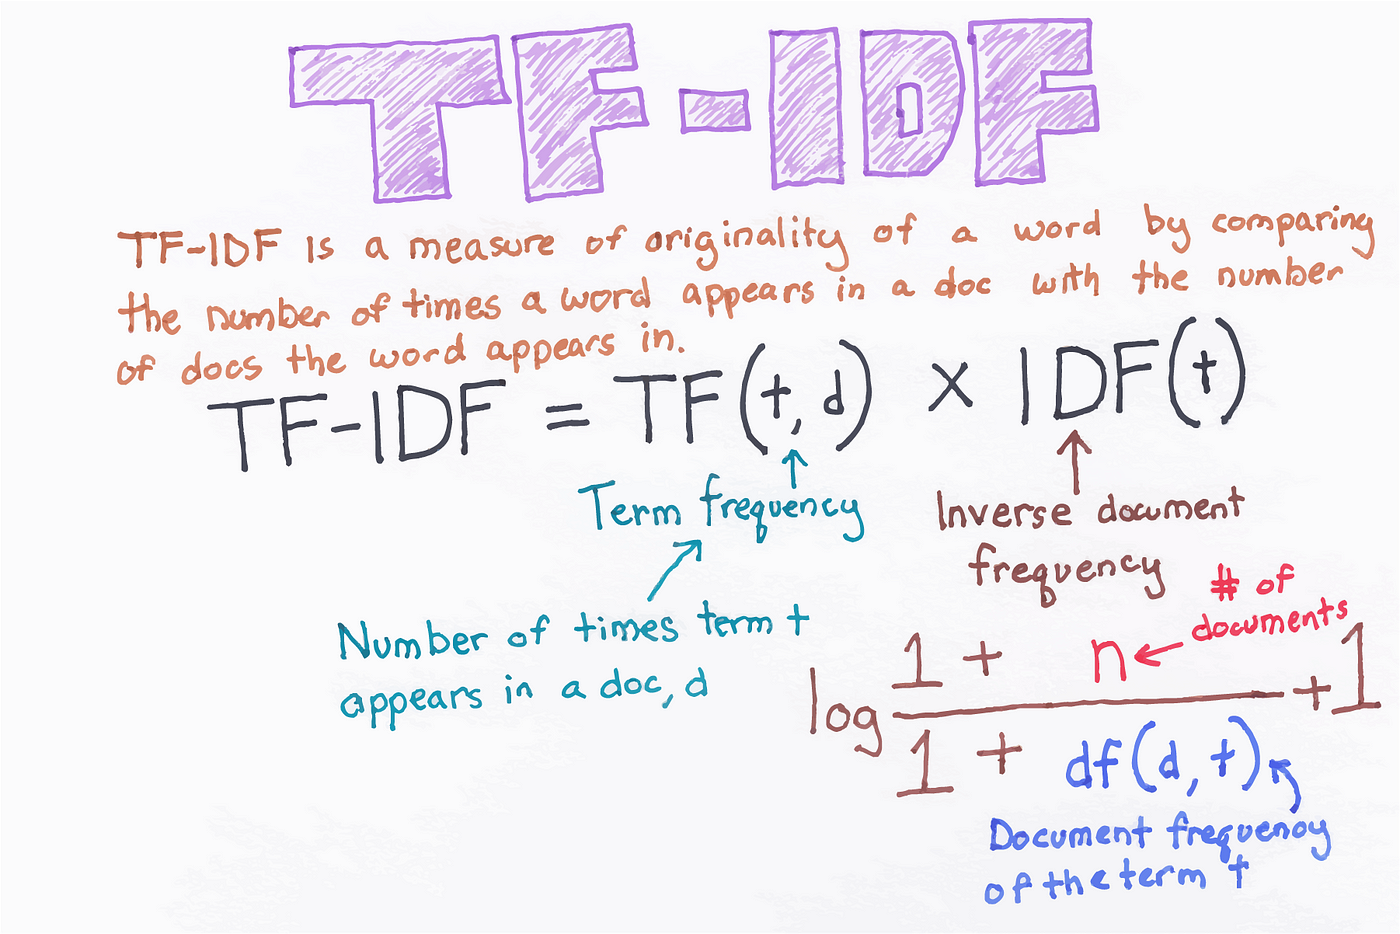


Using sample documents or text senteces  to demonstrate the TF-IDF calculation and similarity.  

---

Libraries:
* **sklearn** see [Machine Learning in Python](https://scikit-learn.org/stable/#) for more information
* **numpy** see [he fundamental package for scientific computing](https://numpy.org/) for more information
* **pandas** see [powerful, flexible and easy to use data analysis and manipulation tool](https://pandas.pydata.org/) for more information

Data:  
* (1.Example) ...on the fly...
* (2.Example) ...song lyrics...
> SONG_beatles-mister-postman.txt  
> SONG_sheeran-perfect.txt


Links/References
* [The Programming Donation](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf)
* [Towards Datascience](https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76)
* [Kaggle](https://www.kaggle.com/uthamkanth/beginner-tf-idf-and-cosine-similarity-from-scratch)
---  

History:  
* V1   June 2020, dbe - initial version for CAS BIA10
* V2   July 2021, dbe - migrate for CAS BIA11 to colab notebook, minor corrections, adding SKLEARN functions  
* V3   May 2024, dbe - adaptions for BINA FS24  

---

## Introduction
TF-IDF stands for “**Term Frequency** — **Inverse Document Frequency**”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus.

This method is a widely used technique in Information Retrieval and Text Mining.  
```
# TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
```
*Terminology*  
> t — term (word)  
> d — document (set of words)  
> N — count of corpus  
> corpus — the total document set   

***Term Frequency*** measures the frequency of a word in a document.  
> tf(t,d) = count of t in d / number of words in d

***Document Frequency*** measures the importance of document in whole set of corpus
> df(t) = occurrence of t in documents (in the corpus)  

***Inverse Document Frequency*** is the inverse of the document frequency which measures the informativeness of term t
> idf(t) = N/df

But how will the computer "understand" text sentences in documents? The computer can understand any data only in the form of numerical value. For this reason we need to vectorize the text of documents.   

By **vectorizing** the documents we can further perform multiple tasks such as finding the relevant documents, ranking, clustering and so on. This is the same thing that happens when you perform a google search.  

### Import Libraries

In [1]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import math

### Initialize documents

In [2]:
# init test documents
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

### I) **Term Frequency** (TF)

---
##### Local function **COMPUTE_TF**

In [3]:
#Term Frequency - word occurences in a document
def compute_tf(docs_list):
    for doc in docs_list:
        doc1_lst = doc.split(" ")
        wordDict_1= dict.fromkeys(set(doc1_lst), 0)

        for token in doc1_lst:
            wordDict_1[token] +=  1
        df = pd.DataFrame([wordDict_1])
        idx = 0
        new_col = ["Term Frequency"]
        df.insert(loc=idx, column='Document', value=new_col)
        print(df)

In [4]:
# calcuate term frequency
tf_doc = compute_tf([documentA, documentB])

         Document  man  for  out  went  the  a  walk
0  Term Frequency    1    1    1     1    1  1     1
         Document  fire  children  sat  the  around
0  Term Frequency     1         1    1    2       1


---
##### Local function **COMPUTE_normalizedTF**

In [5]:
def termFrequency(term, document):
    normalizeDocument = document.lower().split()
    return normalizeDocument.count(term.lower()) / float(len(normalizeDocument))


def compute_normalizedtf(documents):
    tf_doc = []
    for txt in documents:
        sentence = txt.split()
        norm_tf= dict.fromkeys(set(sentence), 0)
        for word in sentence:
            norm_tf[word] = termFrequency(word, txt)
        tf_doc.append(norm_tf)
        df = pd.DataFrame([norm_tf])
        idx = 0
        new_col = ["Normalized TF"]
        df.insert(loc=idx, column='Document', value=new_col)
        print(df)
    return tf_doc

In [6]:
# calcuate normalized TF
normtf_doc = compute_normalizedtf([documentA, documentB])

        Document       man       for       out      went       the         a  \
0  Normalized TF  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857   

       walk  
0  0.142857  
        Document      fire  children       sat       the    around
0  Normalized TF  0.166667  0.166667  0.166667  0.333333  0.166667


### II) **Inverse Document Frequency** (IDF)

---
##### Local function **COMPUTE_IDF**

In [7]:
def inverseDocumentFrequency(term, allDocuments):
    numDocumentsWithThisTerm = 0
    for doc in range (0, len(allDocuments)):
        if term.lower() in allDocuments[doc].lower().split():
            numDocumentsWithThisTerm = numDocumentsWithThisTerm + 1

    if numDocumentsWithThisTerm > 0:
        return 1.0 + math.log(float(len(allDocuments)) / numDocumentsWithThisTerm)
    else:
        return 1.0

def compute_idf(documents):
    idf_dict = {}
    for doc in documents:
        sentence = doc.split()
        for word in sentence:
            idf_dict[word] = inverseDocumentFrequency(word, documents)
    return idf_dict

In [8]:
# calcuate inverse document frequency
idf_dict = compute_idf([documentA, documentB])

compute_idf([documentA, documentB])

{'the': 1.0,
 'man': 1.6931471805599454,
 'went': 1.6931471805599454,
 'out': 1.6931471805599454,
 'for': 1.6931471805599454,
 'a': 1.6931471805599454,
 'walk': 1.6931471805599454,
 'children': 1.6931471805599454,
 'sat': 1.6931471805599454,
 'around': 1.6931471805599454,
 'fire': 1.6931471805599454}

### III) Rather than manually implementing TF-IDF ourselves, we could use the class provided by **SKLEARN**
---
The values differ slightly because sklearn uses a smoothed version idf and various other little optimizations







##### **a) Vector Space** Representation ...

The set of documents in a collection then is viewed as a set of vectors in a vector space. Each term will have its own axis

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
#initialize the vectorizer
vectorizer=TfidfVectorizer(use_idf=True)

In [11]:
dataset = [documentA,documentB]

In [12]:
#calculate the TF-IDF scores
tfIdf = vectorizer.fit_transform(dataset)

In [22]:
# print some (detail) results
print("Vocabulary:", vectorizer.vocabulary_)
print("       IDF:", vectorizer.idf_)
print(" StopWords:", vectorizer.stop_words)

Vocabulary: {'the': 7, 'man': 4, 'went': 9, 'out': 5, 'for': 3, 'walk': 8, 'children': 1, 'sat': 6, 'around': 0, 'fire': 2}
       IDF: [1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.         1.40546511 1.40546511]
 StopWords: None


In [25]:
feature_names = vectorizer.get_feature_names_out()
print("Feature names:", feature_names)

Feature names: ['around' 'children' 'fire' 'for' 'man' 'out' 'sat' 'the' 'walk' 'went']


In [26]:
#tabular output of the scores
#but first transform into a dataframe
df = pd.DataFrame(tfIdf[0].T.todense(), index=feature_names, columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

print (df.head(25))

            TF-IDF
for       0.426160
man       0.426160
out       0.426160
walk      0.426160
went      0.426160
the       0.303216
around    0.000000
children  0.000000
fire      0.000000
sat       0.000000


In [27]:
dense = tfIdf.todense()
denselist = dense.tolist()

print(feature_names)

['around' 'children' 'fire' 'for' 'man' 'out' 'sat' 'the' 'walk' 'went']


In [28]:
df = pd.DataFrame(denselist, columns=feature_names)

print(df)

     around  children      fire      for      man      out       sat  \
0  0.000000  0.000000  0.000000  0.42616  0.42616  0.42616  0.000000   
1  0.407401  0.407401  0.407401  0.00000  0.00000  0.00000  0.407401   

        the     walk     went  
0  0.303216  0.42616  0.42616  
1  0.579739  0.00000  0.00000  


##### and **b) Cosine Similarity**  

Cosine similarity measures the similarity between two vectors. Since TF-IDF returns vectors showing the score a document gets versus the corpus, we can use cosine similarity to identify the closest matches after we’ve used TF-IDF to generate the vectors.

In [29]:
# extract the TF-IDF vectors for documentA and documentB
x = df.iloc[:,1:].values

# --- documentA TF-IDF vector
a= x[0]

# --- documentB TF-IDF vector
b= x[1]

In [33]:
# manually compute cosine similarity using numpy
import numpy as np

dot = np.dot(a, b)

norma = np.linalg.norm(a)
normb = np.linalg.norm(b)

cos_similarity = dot / (norma * normb)

print("Norm documentA: ", norma)
print("Norm documentB: ", normb)
print("\nCosine Similaritiy of documentA vs documentB: ",cos_similarity)

Norm documentA:  1.0
Norm documentB:  0.9132492714582718

Cosine Similaritiy of documentA vs documentB:  0.19248422515864902


---
### IV) 2nd Example - Song Lyrics

##### Load (pre processed and uploaded) song lyrics  
**Note:** first upload the files ito the notebook sandbox!!!

In [ ]:
filePATH = "/content/sample_data/"
fileNameA= "SongData_beatles-mister-postman.txt"
songA_artist = "Beatles"

f = open(filePATH+fileNameA, "r")
songA = f.read()

print(songA)

In [61]:
fileNameB= "SongData_sheeran-perfect.txt"
songB_artist = "Ed Sheeran"

f = open(filePATH+fileNameB, "r")
songB = f.read()

print(songB)

i found a love for me
darling just dive right in
and follow my lead
well i found a girl beautiful and sweet
i never knew you were the someone waiting for me
because we were just kids when we fell in love
not knowing what it was
i will not give you up this time
but darling  just kiss me slow  your heart is all i own
and in your eyes you are holding mine
baby  i am dancing in the dark with you between my arms
barefoot on the grass  listening to our favorite song
when you said you looked a mess  i whispered underneath my breath
but you heard it  darling  you look perfect tonight
well i found a woman  stronger than anyone i know
she shares my dreams  i hope that someday i will share her home
i found a love  to carry more than just my secrets
to carry love  to carry children of our own
we are still kids  but we are so in love
fighting against all odds
i know we will be alright this time
darling  just hold my hand
be my girl  i will be your man
i see my future in your eyes
baby  i am dancing

In [64]:
print(" Song A ("+songA_artist+") Length:", len(songA))
print(" Song B ("+songB_artist+") Length:", len(songB))

 Song A (Beatles) Length: 1530
 Song B (Ed Sheeran) Length: 1448


In [47]:
dataset = [songA,songB]

In [48]:
#calculate the TF-IDF scores
tfIdf = vectorizer.fit_transform(dataset)

In [49]:
# print some (detail) results
print("Vocabulary:", vectorizer.vocabulary_)
print("       IDF:", vectorizer.idf_)
print(" StopWords:", vectorizer.stop_words)

Vocabulary: {'wait': 150, 'oh': 103, 'yes': 164, 'minute': 93, 'mister': 94, 'postman': 114, 'look': 81, 'and': 5, 'see': 121, 'yeah': 163, 'is': 68, 'there': 142, 'letter': 78, 'in': 67, 'your': 166, 'bag': 12, 'for': 47, 'me': 89, 'please': 113, 'been': 17, 'waiting': 151, 'long': 80, 'time': 144, 'since': 125, 'heard': 58, 'from': 49, 'that': 140, 'girl': 51, 'of': 102, 'mine': 92, 'must': 96, 'be': 14, 'some': 128, 'word': 162, 'today': 146, 'my': 97, 'girlfriend': 52, 'so': 127, 'far': 41, 'away': 10, 'if': 66, 'standing': 133, 'here': 61, 'patiently': 110, 'just': 70, 'card': 23, 'or': 106, 'saying': 119, 'she': 124, 'returning': 115, 'home': 64, 'to': 145, 'many': 88, 'days': 30, 'you': 165, 'passed': 109, 'by': 22, 'the': 141, 'tear': 138, 'eye': 38, 'did': 33, 'not': 99, 'stop': 135, 'make': 86, 'feel': 43, 'better': 18, 'leaving': 77, 'gotta': 54, 'check': 25, 'it': 69, 'one': 105, 'more': 95, 'deliver': 31, 'sooner': 132, 'found': 48, 'love': 85, 'darling': 29, 'dive': 34, '

In [50]:
feature_names = vectorizer.get_feature_names_out()
print("Feature names:", feature_names)

Feature names: ['against' 'all' 'alright' 'am' 'an' 'and' 'angel' 'anyone' 'are' 'arms'
 'away' 'baby' 'bag' 'barefoot' 'be' 'beautiful' 'because' 'been' 'better'
 'between' 'breath' 'but' 'by' 'card' 'carry' 'check' 'children' 'dancing'
 'dark' 'darling' 'days' 'deliver' 'deserve' 'did' 'dive' 'do' 'dreams'
 'dress' 'eye' 'eyes' 'faith' 'far' 'favorite' 'feel' 'fell' 'fighting'
 'follow' 'for' 'found' 'from' 'future' 'girl' 'girlfriend' 'give' 'gotta'
 'grass' 'hand' 'have' 'heard' 'heart' 'her' 'here' 'hold' 'holding'
 'home' 'hope' 'if' 'in' 'is' 'it' 'just' 'kids' 'kiss' 'knew' 'know'
 'knowing' 'lead' 'leaving' 'letter' 'listening' 'long' 'look' 'looked'
 'looking' 'looks' 'love' 'make' 'man' 'many' 'me' 'mess' 'met' 'mine'
 'minute' 'mister' 'more' 'must' 'my' 'never' 'not' 'now' 'odds' 'of' 'oh'
 'on' 'one' 'or' 'our' 'own' 'passed' 'patiently' 'perfect' 'person'
 'please' 'postman' 'returning' 'right' 'said' 'saw' 'saying' 'secrets'
 'see' 'share' 'shares' 'she' 'since' 'slow' 

In [52]:
#tabular output of the scores
#but first transform into a dataframe
df = pd.DataFrame(tfIdf[0].T.todense(), index=feature_names, columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

print (df.head(15))

           TF-IDF
wait     0.484114
minute   0.418099
oh       0.330078
yeah     0.308073
mister   0.264062
postman  0.264062
letter   0.176042
me       0.140912
please   0.132031
gotta    0.132031
long     0.132031
you      0.125255
there    0.110026
for      0.093941
see      0.093941


In [53]:
print (df.tail(10))

         TF-IDF
holding     0.0
hold        0.0
her         0.0
heart       0.0
have        0.0
hand        0.0
grass       0.0
give        0.0
future      0.0
looking     0.0


In [55]:
feature_names = vectorizer.get_feature_names_out()
dense = tfIdf.todense()
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns=feature_names)

print(df)

   against       all  alright        am       an       and    angel   anyone  \
0  0.00000  0.000000  0.00000  0.000000  0.00000  0.078284  0.00000  0.00000   
1  0.03679  0.073579  0.03679  0.110369  0.03679  0.104705  0.03679  0.03679   

        are      arms  ...      when  whispered      will      with    woman  \
0  0.000000  0.000000  ...  0.000000    0.00000  0.000000  0.000000  0.00000   
1  0.110369  0.110369  ...  0.110369    0.03679  0.147159  0.110369  0.03679   

       word      yeah       yes       you      your  
0  0.022005  0.308073  0.022005  0.125255  0.046971  
1  0.000000  0.000000  0.000000  0.340291  0.104705  

[2 rows x 167 columns]


In [56]:
# extract the TF-IDF vectors for songA and songB
x = df.iloc[:,1:].values

# --- songA TF-IDF vector
a= x[0]

# --- songB TF-IDF vector
b= x[1]

In [66]:
# manually compute cosine similarity using numpy
import numpy as np

dot = np.dot(a, b)

norma = np.linalg.norm(a)
normb = np.linalg.norm(b)

cos_similarity = dot / (norma * normb)

print("Norm Song A: ", norma)
print("Norm Song B: ", normb)
print("\nCosine Similaritiy of SongA ("+songA_artist+") to SongB ("+songB_artist+") : ",cos_similarity)

Norm Song A:  1.0
Norm Song B:  0.9993230286679514

Cosine Similaritiy of SongA (Beatles) to SongB (Ed Sheeran) :  0.15092234136601967


---